In [1]:
import numpy as np
from mnist_util import *

# Basic setup

Getting the training and test data and calculating means, variances (axis=None, axis=1) and covariances.

In [10]:
training, test = mnist_splitted()

means = mean(training)

id = [np.identity(28*28) for _ in range(len(training))]
variances = variance(training)
variances1 = variance(training, axis=0)
covariances = covariance(training)

# Plotting

Here you can see the means and variances of the numbers in the training dataset.

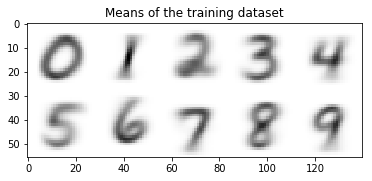

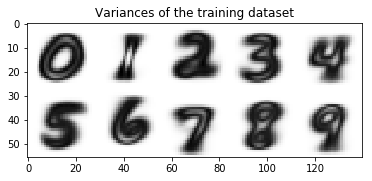

In [11]:
plot_all_numbers(means, elements_per_line=5, plot_title="Means of the training dataset")
plot_all_numbers(variances1, elements_per_line=5, plot_title="Variances of the training dataset")

# PDFs

Using Gaussian multivariate normal distribution (?).
Here I am trying in total 4 different PDFs, where I swapped out the $\Sigma$.

* First one has $\Sigma =$ id.
* Second one has $\Sigma =$ variances.
* Third one has $\Sigma =$ variances1 (The numbers you see above)
* Fourth one has $\Sigma =$ covariances

In [4]:
pdfs_id = multivariates(training, id)
pdfs_var = multivariates(training, variances)
pdfs_var_1 = multivariates(training, variances1)
pdfs_cov = multivariates(training, covariances)

# First test run

Now I am plotting the first 20 numbers of each test dataset (0-9) and thereafter guess/predict the corresponding number with the four PDFs.

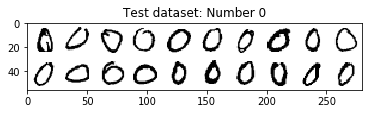

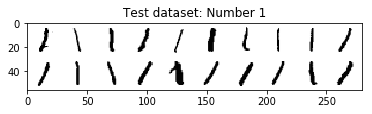

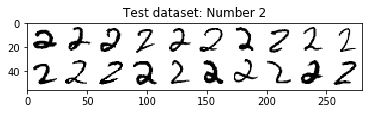

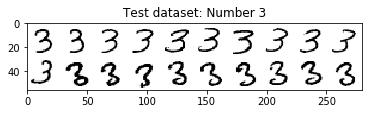

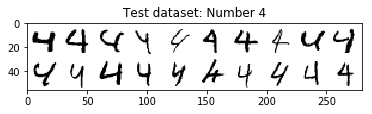

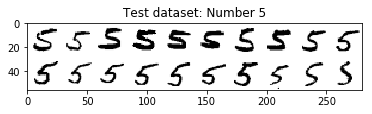

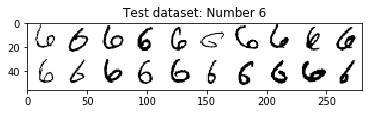

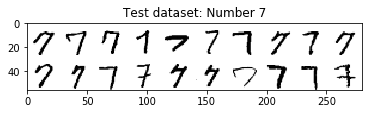

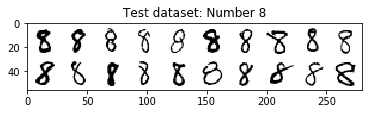

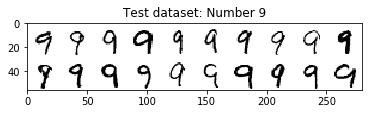

In [5]:
for i in range(10):
    plot_all_numbers(test[i][:20], elements_per_line=10, plot_title="Test dataset: Number {0}".format(i))

In [8]:
for i in range(10):
    guess_identity = [tell_number(pdfs_id, num) for num in test[i][:20]]
    guess_variance = [tell_number(pdfs_var, num) for num in test[i][:20]]
    guess_variance_1 = [tell_number(pdfs_var_1, num) for num in test[i][:20]]
    guess_covariance = [tell_number(pdfs_cov, num) for num in test[i][:20]]
    
    print("Right guess: {0}".format(i))
    print("identity:\t{0}\t ERRORS: {1}".format(guess_identity, len([x for x in guess_identity if x != i])))
    print("variance:\t{0}\t ERRORS: {1}".format(guess_variance, len([x for x in guess_variance if x != i])))
    print("variance1:\t{0}\t ERRORS: {1}".format(guess_variance, len([x for x in guess_variance_1 if x != i])))
    print("covariance:\t{0}\t ERRORS: {1}".format(guess_covariance, len([x for x in guess_covariance if x != i])))
    print("")

Right guess: 0
identity:	[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 5, 0]	 ERRORS: 2
variance:	[5, 0, 0, 0, 0, 0, 5, 0, 6, 0, 0, 0, 0, 0, 6, 6, 0, 0, 5, 5]	 ERRORS: 7
variance1:	[5, 0, 0, 0, 0, 0, 5, 0, 6, 0, 0, 0, 0, 0, 6, 6, 0, 0, 5, 5]	 ERRORS: 1
covariance:	[8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]	 ERRORS: 1

Right guess: 1
identity:	[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 9, 1, 1, 1, 1, 1]	 ERRORS: 1
variance:	[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 9, 1, 1, 1, 1, 1]	 ERRORS: 1
variance1:	[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 9, 1, 1, 1, 1, 1]	 ERRORS: 1
covariance:	[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 1, 1, 1, 1, 1]	 ERRORS: 1

Right guess: 2
identity:	[2, 2, 2, 2, 2, 2, 2, 8, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2]	 ERRORS: 4
variance:	[2, 2, 2, 2, 2, 2, 2, 8, 1, 1, 2, 2, 2, 2, 1, 2, 4, 1, 2, 2]	 ERRORS: 6
variance1:	[2, 2, 2, 2, 2, 2, 2, 8, 1, 1, 2, 2, 2, 2, 1, 2, 4, 1, 2, 2]	 ERRORS: 14
covariance:	[2, 2, 0, 3, 2, 0, 2, 8, 2, 2, 

# Second test run

I was suprised that the variance_1 performed so well in comparision to the others. The maximum of it's errors was about 15, where e.g. the variance's and covariance's errors sometimes exploded.

In [7]:
for i in range(10):
    guess_identity = [tell_number(pdfs_id, num) for num in test[i]]
    guess_variance = [tell_number(pdfs_var, num) for num in test[i]]
    guess_variance_1 = [tell_number(pdfs_var_1, num) for num in test[i][:20]]
    guess_covariance = [tell_number(pdfs_cov, num) for num in test[i]]
    
    print("Number: {0}\tAMOUNT: {1}".format(i, len(test[i])))
    print("identity:\tERRORS: {0}".format(len([x for x in guess_identity if x != i])))
    print("variance:\tERRORS: {0}".format(len([x for x in guess_variance if x != i])))
    print("variance_1:\tERRORS: {0}".format(len([x for x in guess_variance_1 if x != i])))
    print("covariance:\tERRORS: {0}".format(len([x for x in guess_covariance if x != i])))
    print("")

Number: 0	AMOUNT: 903
identity:	ERRORS: 91
variance:	ERRORS: 198
variance_1:	ERRORS: 1
covariance:	ERRORS: 46

Number: 1	AMOUNT: 1877
identity:	ERRORS: 62
variance:	ERRORS: 30
variance_1:	ERRORS: 1
covariance:	ERRORS: 124

Number: 2	AMOUNT: 990
identity:	ERRORS: 238
variance:	ERRORS: 322
variance_1:	ERRORS: 14
covariance:	ERRORS: 206

Number: 3	AMOUNT: 1141
identity:	ERRORS: 216
variance:	ERRORS: 284
variance_1:	ERRORS: 7
covariance:	ERRORS: 229

Number: 4	AMOUNT: 824
identity:	ERRORS: 135
variance:	ERRORS: 141
variance_1:	ERRORS: 11
covariance:	ERRORS: 200

Number: 5	AMOUNT: 313
identity:	ERRORS: 94
variance:	ERRORS: 89
variance_1:	ERRORS: 16
covariance:	ERRORS: 91

Number: 6	AMOUNT: 876
identity:	ERRORS: 117
variance:	ERRORS: 150
variance_1:	ERRORS: 5
covariance:	ERRORS: 64

Number: 7	AMOUNT: 1293
identity:	ERRORS: 187
variance:	ERRORS: 188
variance_1:	ERRORS: 12
covariance:	ERRORS: 474

Number: 8	AMOUNT: 825
identity:	ERRORS: 195
variance:	ERRORS: 311
variance_1:	ERRORS: 8
covarianc